<a href="https://colab.research.google.com/github/tatamiya/blog_artifacts/blob/main/zenn/20230924_imbalanced_ab_test/%E4%B8%8D%E5%9D%87%E7%AD%89%E3%81%AB%E5%89%B2%E3%82%8A%E6%8C%AF%E3%81%A3%E3%81%9FAB%E3%83%86%E3%82%B9%E3%83%88_Permutation_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Permutation Test
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.permutation_test.html

In [1]:
import numpy as np
from scipy.stats import permutation_test, bernoulli

import matplotlib.pyplot as plt

In [2]:
p=0.001

sample_size_a = 1000
sample_size_b = 100

In [3]:
def statistic(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)

# 1度のみの試行例

In [4]:
ber_x_a = bernoulli.rvs(p, size=sample_size_a, random_state=13)
ber_x_b = bernoulli.rvs(p, size=sample_size_b, random_state=13)

In [5]:
ber_x_a.mean() - ber_x_b.mean()

0.003

In [6]:
res = permutation_test((ber_x_a, ber_x_b), statistic, vectorized=True, alternative='two-sided')
res

PermutationTestResult(statistic=0.003, pvalue=1.0, null_distribution=array([ 0.003, -0.008,  0.003, ...,  0.003,  0.003,  0.003]))

In [7]:
res.pvalue

1.0

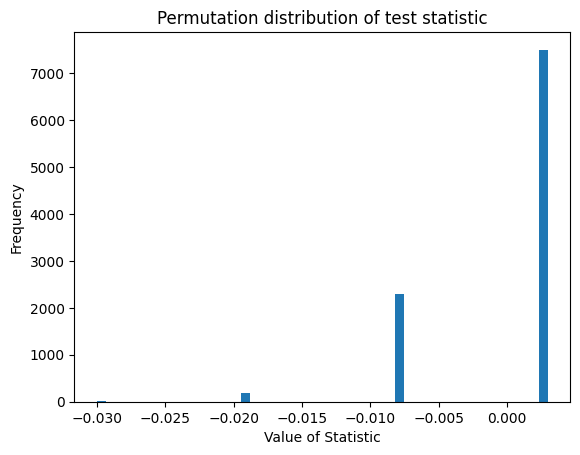

In [8]:
plt.hist(res.null_distribution, bins=50)
plt.title("Permutation distribution of test statistic")
plt.xlabel("Value of Statistic")
plt.ylabel("Frequency")
plt.show()

# 10,000回試行

In [9]:
num_iteration = 10000

ber_x_a = bernoulli.rvs(p, size=(sample_size_a, num_iteration), random_state=13)
ber_x_b = bernoulli.rvs(p, size=(sample_size_b, num_iteration), random_state=13)

In [10]:
pt_pvalues = np.array([permutation_test((x_a_i, x_b_i), statistic, vectorized=True, alternative='two-sided').pvalue for x_a_i, x_b_i in zip(ber_x_a.T, ber_x_b.T)])

In [11]:
# 10000回の試行の中で、「有意差あり」と判断が出たケースがどれだけあったかを調べる
(pt_pvalues < 0.05).mean()

0.0

(array([2.700e+01, 6.000e+00, 3.020e+02, 2.500e+01, 3.530e+02, 6.100e+01,
        1.000e+02, 4.400e+01, 4.000e+00, 9.078e+03]),
 array([0.0826 , 0.17434, 0.26608, 0.35782, 0.44956, 0.5413 , 0.63304,
        0.72478, 0.81652, 0.90826, 1.     ]),
 <BarContainer object of 10 artists>)

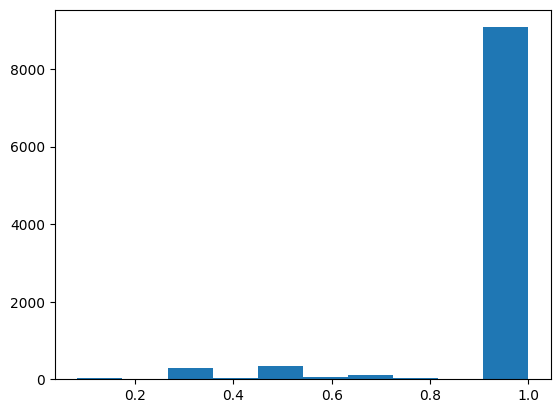

In [12]:
plt.hist(pt_pvalues)